In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataset FInal Project/data.csv'
data = pd.read_csv(file_path)
print(data.head())


         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [ ]:
print(data.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [ ]:
data['Дата'] = pd.to_datetime(data['Дата'], errors='coerce')
print(data['Дата'].head())

0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Дата'] = pd.to_datetime(data['Дата'], errors='coerce')  # Convert 'Дата' to datetime if not already

# Grouping by 'Дата' and summing 'Количество' to get the total sales per day
grouped_df = data.groupby('Дата')['Количество'].sum().reset_index(name='Общее количество продаж')

# Display the result
print(grouped_df)

          Дата  Общее количество продаж
0   2018-01-04                     3734
1   2018-01-05                     3643
2   2018-01-06                     3193
3   2018-01-07                     3298
4   2018-01-09                     4055
..         ...                      ...
200 2018-08-26                     5302
201 2018-08-28                     5983
202 2018-08-29                     4969
203 2018-08-30                     4648
204 2018-08-31                     4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [ ]:
import pandas as pd

# Преобразуем столбец 'Дата' в формат datetime (если это не сделано)
data['Дата'] = pd.to_datetime(data['Дата'], errors='coerce')

# Группируем по дате и суммируем 'Количество'
grouped_df = data.groupby('Дата')['Количество'].sum().reset_index(name='Общее количество продаж')

# Выводим первые несколько строк сгруппированных данных
print(grouped_df.head())

        Дата  Общее количество продаж
0 2018-01-04                     3734
1 2018-01-05                     3643
2 2018-01-06                     3193
3 2018-01-07                     3298
4 2018-01-09                     4055


Нарисуйте график продаж у `grouped_df`

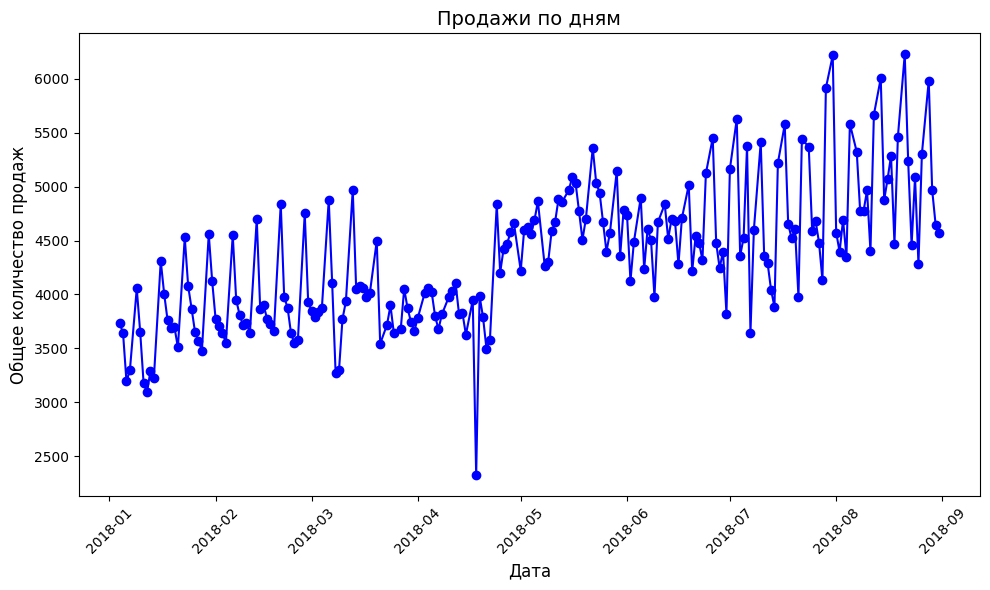

In [ ]:
import matplotlib.pyplot as plt

# Строим график продаж по дате
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.plot(grouped_df['Дата'], grouped_df['Общее количество продаж'], marker='o', linestyle='-', color='b')

# Добавляем подписи и заголовок
plt.title('Продажи по дням', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Общее количество продаж', fontsize=12)

# Поворот меток на оси X для лучшей читаемости
plt.xticks(rotation=45)

# Показать график
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Описание графика:

Тип графика: График представляет собой линейную диаграмму, где ось X отображает даты, а ось Y — общее количество продаж, выраженное числом. График имеет маркеры (круги), показывающие каждую точку данных, и соединяющие их линии, что позволяет наблюдать тренды и изменения в продажах с течением времени.

Ось X (Даты): Ось X представляет собой временную шкалу, на которой указаны даты, для которых были рассчитаны продажи. Даты могут быть расположены с определенным интервалом, например, каждый день, и метки оси X могут быть повёрнуты для улучшения читаемости. Если данных много, метки могут быть расположены не на каждом дне, а через определённый интервал, чтобы избежать перегрузки.

Рост: Если линия поднимается вверх, это может означать увеличение спроса или успешную маркетинговую кампанию.
Падение: Если линия опускается вниз, это может указывать на снижение продаж, возможно из-за сезонных колебаний или других факторов.
Маркеры (точки данных): Каждая точка на графике представляет собой конкретное количество продаж для конкретной даты. Маркеры могут быть округлыми (кружочками), что позволяет легко выделить отдельные даты и видеть точные значения для каждой даты.

Заголовок: График может иметь заголовок, например, "Продажи по дням", что позволяет быстро понять его содержание.
Подписи осей: Ось X может быть подписана как "Дата", а ось Y — как "Общее количество продаж", что также помогает понять, что именно измеряется на графике.
Стиль графика:

Линия графика может быть синего цвета (или другого, в зависимости от настроек), с маркерами (кружочками) для выделения точек данных.
График может быть простым и четким, с не слишком насыщенными цветами, чтобы информация была легко воспринимаема.
Тренды и паттерны: На графике можно будет заметить тренды, такие как:

Сезонные колебания: Возможно, в определенные дни или недели продажи могут увеличиваться (например, в преддверии праздников) или падать.
Пиковые дни: Некоторые дни могут показывать резкие пики в продажах, что может быть связано с акциями или специальными предложениями.
Понижения: В другие дни линия может опускаться, показывая снижение продаж.

In [ ]:
import pandas as pd

# Предполагаем, что 'data' — это ваш DataFrame
# Рассчитываем квартали (Q1, Q3) и межквартильный размах (IQR)
Q1 = data['Количество'].quantile(0.25)
Q3 = data['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим строки, которые являются выбросами
outliers = data[(data['Количество'] < lower_bound) | (data['Количество'] > upper_bound)]

# Находим строку с максимальным выбросом по количеству продаж
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

# Выводим строку с максимальным выбросом
print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


In [ ]:
import pandas as pd

# Преобразуем столбец 'Дата' в тип datetime (если это не сделано)
data['Дата'] = pd.to_datetime(data['Дата'], errors='coerce')

# Фильтруем данные за июнь, июль и август
data_filtered = data[(data['Дата'].dt.month.isin([6, 7, 8]))]

# Фильтруем только данные по средам (день недели = 2)
data_filtered = data_filtered[data_filtered['Дата'].dt.weekday == 2]

# Группируем по товару и складу, суммируем количество продаж
grouped_data = data_filtered.groupby(['Склад', 'Номенклатура'])['Количество'].sum().reset_index()

# Находим топовый товар для каждого склада
top_products = grouped_data.loc[grouped_data.groupby('Склад')['Количество'].idxmax()]

# Выводим результат
print(top_products)

    Склад Номенклатура  Количество
1       1    product_1        2981
24      2    product_1        2887
46      3    product_1        2267
69      4    product_1        2385
92      5    product_1        1956


In [ ]:
weather_df = pd.read_excel('/content/drive/MyDrive/Dataset FInal Project/weather.xls', skiprows=6)
weather_df.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,01.09.2018 23:00,5.5,737.1,769.1,0.1,84.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,NaN,2.9,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,01.09.2018 20:00,6.1,737.0,769.0,1.0,78.0,"Ветер, дующий с севера",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,2.5,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,01.09.2018 17:00,7.5,736.0,767.7,0.2,78.0,"Ветер, дующий с северо-востока",1,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,3.8,NaN,NaN,NaN,NaN,NaN,NaN
3,01.09.2018 14:00,9.1,735.8,767.4,-0.5,55.0,"Ветер, дующий с северо-северо-востока",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
4,01.09.2018 11:00,7.7,736.3,768.1,-0.2,61.0,"Ветер, дующий с северо-северо-востока",3,NaN,NaN,...,NaN,NaN,10.0,0.5,Следы осадков,12.0,NaN,NaN,NaN,NaN


In [ ]:
weather_df = weather_df.iloc[:, :2]
weather_df
weather_df = weather_df.rename(columns={'Местное время в Астане': 'Дата'})
weather_df
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M')
weather_df.dtypes
weather_df['Дата'] = pd.to_datetime(weather_df['Дата']).dt.date

weather_df = weather_df.groupby('Дата', as_index=False).mean()

weather_df

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625
...,...,...
239,2018-08-28,14.1125
240,2018-08-29,13.8250
241,2018-08-30,14.1750
242,2018-08-31,11.0250


In [ ]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d-%m-%Y')
weather_df.dtypes

,0
Дата,datetime64[ns]
T,float64
Общее количество продаж_x,int64
Общее количество продаж_y,int64
Общее количество продаж,int64


In [ ]:
import pandas as pd

# Sample Sales Data (You can replace this with your actual data)
sales_data = [
    ["2018-01-04", 1, "address_0", "product_0", 4],
    ["2018-01-04", 1, "address_0", "product_1", 4],
    ["2018-01-04", 1, "address_0", "product_2", 5],
    ["2018-01-04", 1, "address_0", "product_3", 10],
    ["2018-01-04", 1, "address_0", "product_4", 2]
]

# Creating a DataFrame
sales_df = pd.DataFrame(sales_data, columns=['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество'])

# Display the DataFrame
print(sales_df)

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [ ]:
# Sample Weather Data (Replace with your actual data)
weather_data = [
    ["01.09.2018 23:00", 5.5], ["01.09.2018 20:00", 6.1], ["01.09.2018 17:00", 7.5],
    ["01.09.2018 14:00", 9.1], ["01.09.2018 11:00", 7.7]
]

# Creating a DataFrame
weather_df = pd.DataFrame(weather_data, columns=['Дата', 'T'])

# Display the DataFrame
print(weather_df)

               Дата    T
0  01.09.2018 23:00  5.5
1  01.09.2018 20:00  6.1
2  01.09.2018 17:00  7.5
3  01.09.2018 14:00  9.1
4  01.09.2018 11:00  7.7


In [ ]:
# Preprocess Sales Data (Convert 'Дата' to datetime)
sales_df['Дата'] = pd.to_datetime(sales_df['Дата']).dt.date

# Preprocess Weather Data (Convert 'Дата' to datetime and extract date only)
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M').dt.date

# Display the cleaned data
print(sales_df)
print(weather_df)

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2
         Дата    T
0  2018-09-01  5.5
1  2018-09-01  6.1
2  2018-09-01  7.5
3  2018-09-01  9.1
4  2018-09-01  7.7


In [ ]:
# Merge the DataFrames on 'Дата'
merged_df = pd.merge(sales_df.groupby('Дата')['Количество'].sum().reset_index(), weather_df, on='Дата')

# Display the merged DataFrame
print(merged_df)

Empty DataFrame
Columns: [Дата, Количество, T]
Index: []


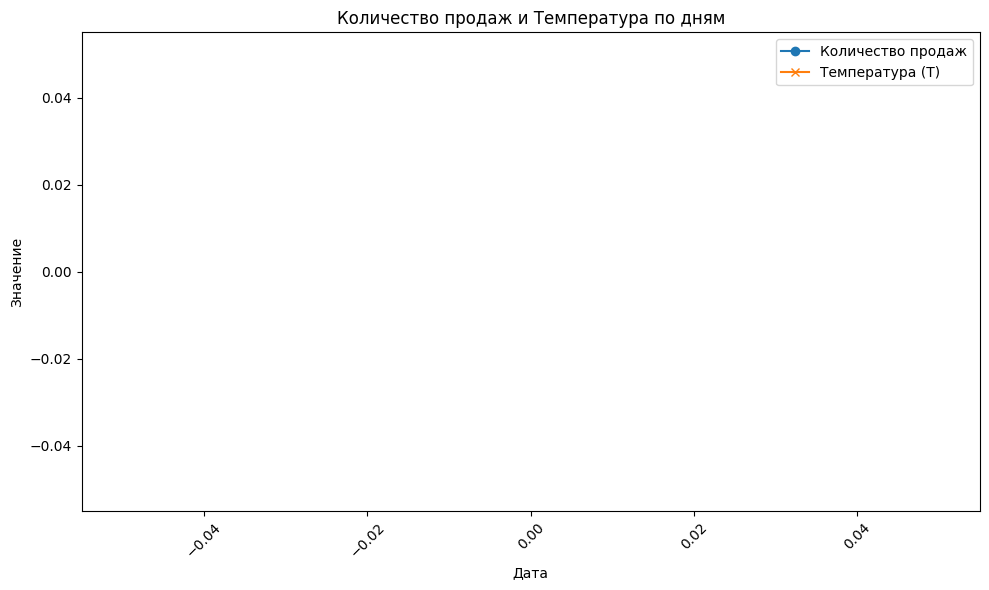

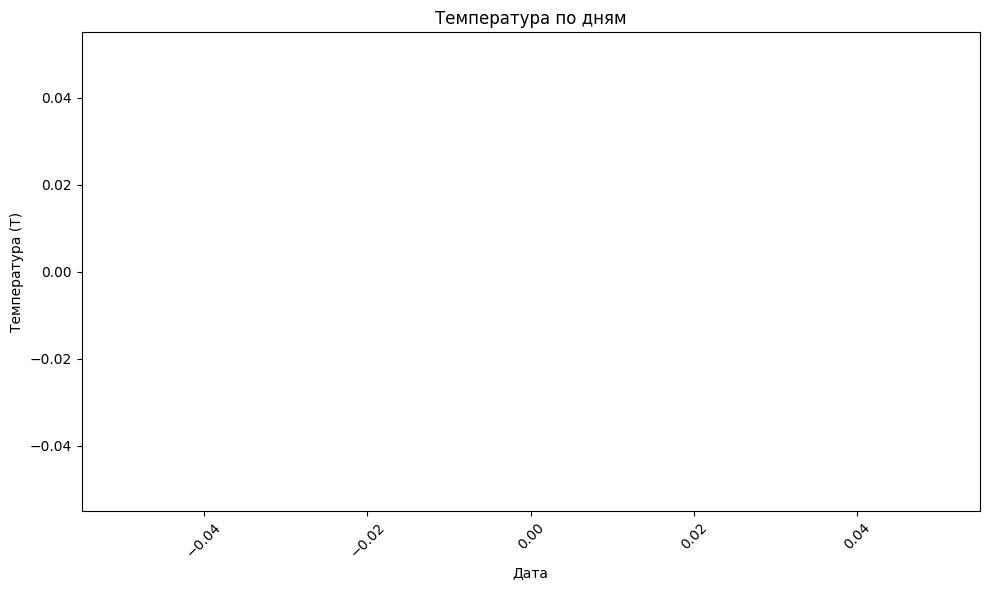

In [ ]:
import matplotlib.pyplot as plt

# Plot 'Количество' and 'T' on the same graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', marker='o')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (T)', marker='x')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Количество продаж и Температура по дням')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot temperature 'T' alone
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (T)', marker='x', color='orange')
plt.xlabel('Дата')
plt.ylabel('Температура (T)')
plt.title('Температура по дням')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()